<a href="https://colab.research.google.com/github/Ansalnakhan/projectansalna/blob/main/ansalnaSOHandRUL05final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1106]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [1107]:
import pandas as pd

In [1108]:
data=pd.read_csv("/content/file1.csv")
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922
...,...,...,...,...,...,...,...,...,...,...,...
50280,50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312
50281,50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062
50282,50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828
50283,50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,0.0006,0.000,2810.640


In [1109]:
data=data.drop_duplicates(subset=['cycle'], keep='last')
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
196,196,1,24,2008-04-02 15:25:41,1.856487,3.277170,-0.006528,34.230853,-0.0006,0.0,3690.234
392,392,2,24,2008-04-02 19:43:48,1.846327,3.300245,-0.000448,34.392137,-0.0006,0.0,3672.344
587,587,3,24,2008-04-03 00:01:06,1.835349,3.327451,0.001026,34.232779,-0.0006,0.0,3651.641
781,781,4,24,2008-04-03 04:16:37,1.835263,3.314182,-0.002234,34.413450,-0.0006,0.0,3631.563
975,975,5,24,2008-04-03 08:33:25,1.834646,3.305497,0.000009,34.345885,-0.0006,0.0,3629.172
...,...,...,...,...,...,...,...,...,...,...,...
49092,49092,164,24,2008-05-26 10:44:38,1.293464,3.615561,-0.002548,34.075649,0.0006,0.0,2793.390
49389,49389,165,24,2008-05-26 15:30:43,1.288003,3.621191,-0.002460,33.991350,0.0006,0.0,2793.390
49686,49686,166,24,2008-05-26 20:21:04,1.287453,3.619185,0.000478,34.059198,0.0006,0.0,2792.485
49984,49984,167,24,2008-05-27 15:52:41,1.309015,3.595365,-0.002342,34.556514,0.0006,0.0,2802.016


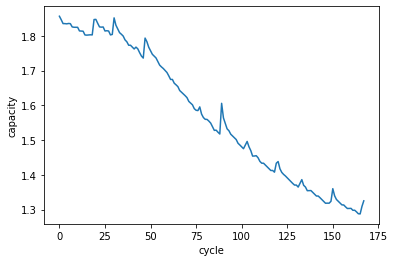

In [1110]:
import matplotlib.pyplot as plt
plt.plot(range(len(data["capacity"])),data["capacity"])
plt.ylabel('capacity')
plt.xlabel('cycle')
plt.show()

In [1111]:
capacity=data[["capacity"]]
capacity=capacity.set_index(pd.Index(range(len(capacity))))
capacity

,capacity
0,1.856487
1,1.846327
2,1.835349
3,1.835263
4,1.834646
...,...
163,1.293464
164,1.288003
165,1.287453
166,1.309015


In [1112]:
soh=[]
for i in range(len(capacity)):
  soh.append(capacity.loc[i].at["capacity"]/capacity.loc[0].at["capacity"])

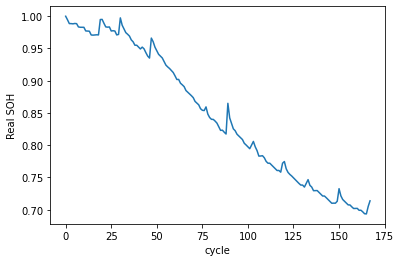

In [1113]:
plt.plot(range(len(soh)),soh)
plt.ylabel('Real SOH')
plt.xlabel('cycle')
plt.show()

In [1114]:
capacity=np.asarray(capacity)

In [1115]:
type(capacity)

numpy.ndarray

In [1116]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(soh[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]  

In [1117]:
from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [1118]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 6ms/step - loss: 0.6296
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0651
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0328
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0504
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0171
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 9/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0023
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0018


In [1119]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [1120]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error,r2_score

In [1121]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 6ms/step


0.00013276001440562998

In [1122]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 0.012


In [1123]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.00919616]
R2_score:  0.8236024682581392


Text(0.5, 0, 'cycle')

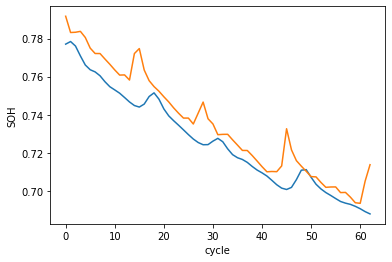

In [1124]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)
plt.ylabel('SOH')
plt.xlabel('cycle')

In [1125]:
preds = model.predict(X)

6/6 [==============================] - 0s 2ms/step


In [1126]:
preds

array([[0.94117075],
       [0.93929905],
       [0.93889886],
       [0.9387583 ],
       [0.9378537 ],
       [0.9360594 ],
       [0.9345904 ],
       [0.93391114],
       [0.9328392 ],
       [0.9309424 ],
       [0.9292192 ],
       [0.92769396],
       [0.92568105],
       [0.92418134],
       [0.9238772 ],
       [0.92485225],
       [0.9291785 ],
       [0.9367984 ],
       [0.9415137 ],
       [0.9400406 ],
       [0.9366482 ],
       [0.934574  ],
       [0.9331139 ],
       [0.93116724],
       [0.9294629 ],
       [0.9279735 ],
       [0.9269743 ],
       [0.92988384],
       [0.9358682 ],
       [0.93734264],
       [0.9330758 ],
       [0.9284845 ],
       [0.9251451 ],
       [0.9220646 ],
       [0.9185404 ],
       [0.9149603 ],
       [0.91200143],
       [0.9098778 ],
       [0.908199  ],
       [0.9069384 ],
       [0.90626127],
       [0.90465826],
       [0.9011654 ],
       [0.89835405],
       [0.9010114 ],
       [0.90875894],
       [0.9127189 ],
       [0.909

Text(0.5, 0, 'cycle')

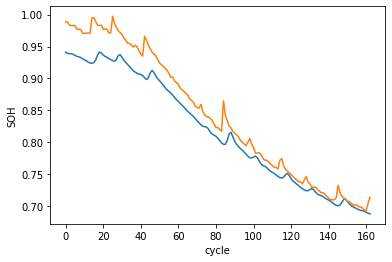

In [1127]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)
plt.ylabel('SOH')
plt.xlabel('cycle')

Predicting Capacity

In [1128]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(capacity[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k] 

In [1129]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 2.6451
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 1.2729
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1776
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2214
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1139
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1368
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0114
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0557
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0280


In [1130]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [1131]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 6ms/step


0.0006563671932574039

In [1132]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.026


In [1133]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.02218441]
R2_score:  0.7469606535595158


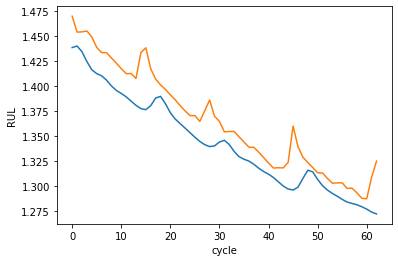

In [1134]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)
plt.ylabel('RUL')
plt.xlabel('cycle')
plt.show()


In [1135]:
preds = model.predict(X)

6/6 [==============================] - 0s 3ms/step


In [1136]:
preds

array([[1.7409146],
       [1.7380449],
       [1.7375156],
       [1.7371438],
       [1.7350615],
       [1.7316526],
       [1.7293067],
       [1.7281045],
       [1.7257358],
       [1.7221482],
       [1.719219 ],
       [1.7161584],
       [1.7123796],
       [1.7100654],
       [1.7097166],
       [1.712083 ],
       [1.72177  ],
       [1.7359911],
       [1.742383 ],
       [1.7384473],
       [1.7325351],
       [1.7291589],
       [1.7262199],
       [1.722563 ],
       [1.7196896],
       [1.716673 ],
       [1.7154589],
       [1.7228737],
       [1.7333913],
       [1.7335142],
       [1.7251546],
       [1.7171246],
       [1.7111732],
       [1.7053101],
       [1.6986703],
       [1.692156 ],
       [1.6869568],
       [1.6832402],
       [1.6801211],
       [1.6781031],
       [1.676852 ],
       [1.673185 ],
       [1.666315 ],
       [1.6621096],
       [1.6696482],
       [1.6840895],
       [1.6884048],
       [1.6808314],
       [1.6711401],
       [1.6634933],


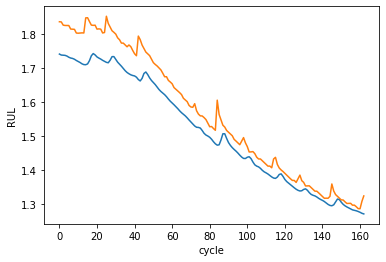

In [1137]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)
plt.ylabel('RUL')
plt.xlabel('cycle')
plt.show()